In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv("eval.csv")

In [3]:
df_train.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [4]:
df_test.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,35.0,0,0,8.0500,Third,unknown,Southampton,y
1,0,male,54.0,0,0,51.8625,First,E,Southampton,y
2,1,female,58.0,0,0,26.5500,First,C,Southampton,y
3,1,female,55.0,0,0,16.0000,Second,unknown,Southampton,y
4,1,male,34.0,0,0,13.0000,Second,D,Southampton,y


In [5]:
df_train.describe

<bound method NDFrame.describe of      survived     sex   age  n_siblings_spouses  parch     fare   class  \
0           0    male  22.0                   1      0   7.2500   Third   
1           1  female  38.0                   1      0  71.2833   First   
2           1  female  26.0                   0      0   7.9250   Third   
3           1  female  35.0                   1      0  53.1000   First   
4           0    male  28.0                   0      0   8.4583   Third   
..        ...     ...   ...                 ...    ...      ...     ...   
622         0    male  28.0                   0      0  10.5000  Second   
623         0    male  25.0                   0      0   7.0500   Third   
624         1  female  19.0                   0      0  30.0000   First   
625         0  female  28.0                   1      2  23.4500   Third   
626         0    male  32.0                   0      0   7.7500   Third   

        deck  embark_town alone  
0    unknown  Southampton     n

In [6]:
df_test.describe

<bound method NDFrame.describe of      survived     sex   age  n_siblings_spouses  parch     fare   class  \
0           0    male  35.0                   0      0   8.0500   Third   
1           0    male  54.0                   0      0  51.8625   First   
2           1  female  58.0                   0      0  26.5500   First   
3           1  female  55.0                   0      0  16.0000  Second   
4           1    male  34.0                   0      0  13.0000  Second   
..        ...     ...   ...                 ...    ...      ...     ...   
259         1  female  25.0                   0      1  26.0000  Second   
260         0    male  33.0                   0      0   7.8958   Third   
261         0  female  39.0                   0      5  29.1250   Third   
262         0    male  27.0                   0      0  13.0000  Second   
263         1    male  26.0                   0      0  30.0000   First   

        deck  embark_town alone  
0    unknown  Southampton     y

In [7]:
df_test.shape

(264, 10)

In [8]:
df_train.shape

(627, 10)

In [9]:
df_train.isnull

<bound method DataFrame.isnull of      survived     sex   age  n_siblings_spouses  parch     fare   class  \
0           0    male  22.0                   1      0   7.2500   Third   
1           1  female  38.0                   1      0  71.2833   First   
2           1  female  26.0                   0      0   7.9250   Third   
3           1  female  35.0                   1      0  53.1000   First   
4           0    male  28.0                   0      0   8.4583   Third   
..        ...     ...   ...                 ...    ...      ...     ...   
622         0    male  28.0                   0      0  10.5000  Second   
623         0    male  25.0                   0      0   7.0500   Third   
624         1  female  19.0                   0      0  30.0000   First   
625         0  female  28.0                   1      2  23.4500   Third   
626         0    male  32.0                   0      0   7.7500   Third   

        deck  embark_town alone  
0    unknown  Southampton     n

In [10]:
df_train['survived'].isnull

<bound method Series.isnull of 0      0
1      1
2      1
3      1
4      0
      ..
622    0
623    0
624    1
625    0
626    0
Name: survived, Length: 627, dtype: int64>

In [11]:
df_train.corr()

,survived,age,n_siblings_spouses,parch,fare
survived,1.000000,-0.033145,-0.049938,0.085773,0.252478
age,-0.033145,1.000000,-0.214280,-0.166974,0.119287
n_siblings_spouses,-0.049938,-0.214280,1.000000,0.430824,0.137795
parch,0.085773,-0.166974,0.430824,1.000000,0.204204
fare,0.252478,0.119287,0.137795,0.204204,1.000000


In [12]:
df_test.corr()

,survived,age,n_siblings_spouses,parch,fare
survived,1.000000,-0.133740,0.004006,0.072517,0.294246
age,-0.133740,1.000000,-0.291515,-0.183619,0.026260
n_siblings_spouses,0.004006,-0.291515,1.000000,0.380801,0.251314
parch,0.072517,-0.183619,0.380801,1.000000,0.283293
fare,0.294246,0.026260,0.251314,0.283293,1.000000


In [13]:

y_train = df_train.pop('survived')

In [14]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
622    0
623    0
624    1
625    0
626    0
Name: survived, Length: 627, dtype: int64

In [15]:
y_eval = df_test.pop('survived')
y_eval

0      0
1      0
2      1
3      1
4      1
      ..
259    1
260    0
261    0
262    0
263    1
Name: survived, Length: 264, dtype: int64

<AxesSubplot:>

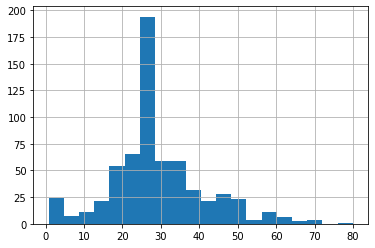

In [16]:
df_train.age.hist(bins=20)

<AxesSubplot:>

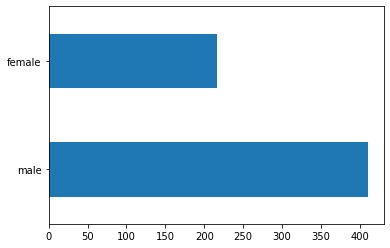

In [17]:
df_train.sex.value_counts().plot(kind="barh")

Text(0.5, 0, 'sex')

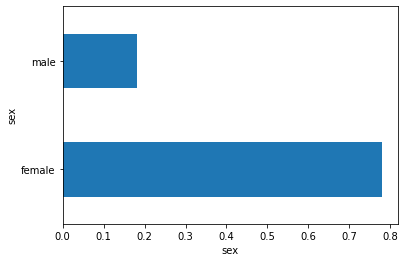

In [18]:
pd.concat([df_train,y_train],axis=1).groupby('sex').survived.mean().plot(kind="barh").set_xlabel('sex')

In [19]:
df_train.head

<bound method NDFrame.head of         sex   age  n_siblings_spouses  parch     fare   class     deck  \
0      male  22.0                   1      0   7.2500   Third  unknown   
1    female  38.0                   1      0  71.2833   First        C   
2    female  26.0                   0      0   7.9250   Third  unknown   
3    female  35.0                   1      0  53.1000   First        C   
4      male  28.0                   0      0   8.4583   Third  unknown   
..      ...   ...                 ...    ...      ...     ...      ...   
622    male  28.0                   0      0  10.5000  Second  unknown   
623    male  25.0                   0      0   7.0500   Third  unknown   
624  female  19.0                   0      0  30.0000   First        B   
625  female  28.0                   1      2  23.4500   Third  unknown   
626    male  32.0                   0      0   7.7500   Third  unknown   

     embark_town alone  
0    Southampton     n  
1      Cherbourg     n  
2    S

In [20]:
import tensorflow.compat.v2.feature_column as fc

categorical_column = ['sex','n_siblings_spouses','parch','class','deck','embark_town','alone']

numerical_column = ['age','fare']

feature_columns = []

In [21]:
for feature_name in categorical_column:
    vocabulary = df_train[feature_name].unique()
    feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name,vocabulary))


for feature_name in numerical_column:
    feature_columns.append(tf.feature_column.numeric_column(feature_name,dtype=tf.float32))

In [22]:
feature_columns

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.strin

In [23]:
df_train[feature_name].unique

<bound method Series.unique of 0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.4583
        ...   
622    10.5000
623     7.0500
624    30.0000
625    23.4500
626     7.7500
Name: fare, Length: 627, dtype: float64>

In [24]:
df_train['sex'].unique()

array(['male', 'female'], dtype=object)

TRAINING PROCESS

In [25]:
def make_input_fn(data_df,label_df,num_epochs=10,shuffle=True,batch_size=32):
    def input_function():
        ds = tf.data.Dataset.from_tensor_slices((dict(data_df),label_df))
        if shuffle:
            ds = ds.shuffle(1000)
        ds =ds.batch(batch_size).repeat(num_epochs)
        return ds
    return input_function
train_inp_fn = make_input_fn(df_train,y_train)
test_input_fn = make_input_fn(df_test,y_eval,num_epochs=1,shuffle=False)

In [26]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\HAMZAD~1\\AppData\\Local\\Temp\\tmpdm7a3udi', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [27]:
linear_est.train(train_inp_fn)


Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\HAMZAD~1\AppData\Local\Temp\tmpdm7a3udi\model.ckpt.
INFO:tensorflow:C:\Users\HAMZAD~1\AppData\Local\Temp\tmpdm7a3udi\model.ckpt-0.data-00000-of-00001
INFO:tensorflow:0
INFO:tensorflow:C:\Users\HAMZAD~1\AppData\Local\Temp\tmpdm7a3udi\model.ckpt-0.index
INFO:tensorflow:0
INFO:tensorflow:C:\Users\HAMZAD~1\AppData\Local\Temp\tmpdm7a3udi\model.ckpt-0.meta
INFO:tensor

In [28]:
result = linear_est.evaluate(test_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2022-09-01T00:27:13
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\HAMZAD~1\AppData\Local\Temp\tmpdm7a3udi\model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 1.13380s
INFO:tensorflow:Finished evaluation at 2022-09-01-00:27:15
INFO:tensorflow:Saving dict for global step 200: accuracy = 0.75757575, accuracy_baseline = 0.625, auc = 0.8363637, auc_precision_recall = 0.79651904, average_loss = 0.46945074, global_step = 200, label/mean = 0.375, loss = 0.46085283, precision = 0.68421054, prediction/mean = 0.36527458, recall = 0.65656567
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 200: C:\Users\HAMZAD~1\AppData\Local\Temp\tmpdm7a3udi\model.ckpt-200


In [29]:

print(result['accuracy'])

0.75757575


In [30]:
print(result)

{'accuracy': 0.75757575, 'accuracy_baseline': 0.625, 'auc': 0.8363637, 'auc_precision_recall': 0.79651904, 'average_loss': 0.46945074, 'label/mean': 0.375, 'loss': 0.46085283, 'precision': 0.68421054, 'prediction/mean': 0.36527458, 'recall': 0.65656567, 'global_step': 200}


In [31]:
result = list(linear_est.predict(test_input_fn))
result

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\HAMZAD~1\AppData\Local\Temp\tmpdm7a3udi\model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'logits': array([-2.6244485], dtype=float32),
  'logistic': array([0.06758143], dtype=float32),
  'probabilities': array([0.9324186 , 0.06758144], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([-0.7332715], dtype=float32),
  'logistic': array([0.32447723], dtype=float32),
  'probabilities': array([0.67552274, 0.32447723], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([0.75247324], dtype=float32),
  'logistic': array([0.67971736], dtype=float32),
  'probabilities': array([0.32028264, 0.67971736], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)}

In [32]:
result[0]

{'logits': array([-2.6244485], dtype=float32),
 'logistic': array([0.06758143], dtype=float32),
 'probabilities': array([0.9324186 , 0.06758144], dtype=float32),
 'class_ids': array([0], dtype=int64),
 'classes': array([b'0'], dtype=object),
 'all_class_ids': array([0, 1]),
 'all_classes': array([b'0', b'1'], dtype=object)}

In [33]:
result[0]['probabilities'][1]

0.06758144

In [34]:
df_train.loc[2]

sex                        female
age                          26.0
n_siblings_spouses              0
parch                           0
fare                        7.925
class                       Third
deck                      unknown
embark_town           Southampton
alone                           y
Name: 2, dtype: object

In [35]:
y_eval.loc[3]

1